1dpi: up=1532 down=724 (p=0)=0
2dpi: up=1837 down=880 (p=0)=0
3dpi: up=1708 down=666 (p=0)=0
7dpi: up=1809 down=661 (p=0)=0


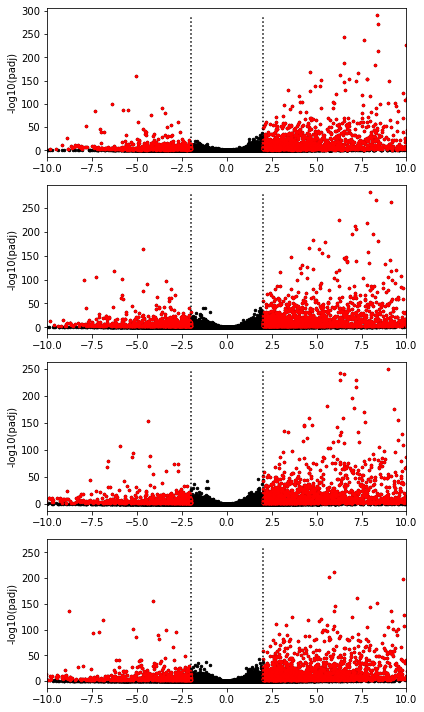

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mode = "foxy"
if mode == "tomato":
    timepoints = [1, 2, 3]
    prefix = "tomato_volcanos"
    setname = "SLYC"
else:
    timepoints = [1, 2, 3, 7]
    prefix = "foxy_volcanos"
    setname = "FOXY"
    
fig = plt.figure(figsize=(6, 10))

for i, dpi in enumerate(timepoints, start=1):
    data = pd.read_csv("/Users/cschu/Documents/amey/foxy/results_2021/{}/genes/{}dpi.csv".format(setname, dpi))

    data = data[data['padj'] > 0]
    
    #sig_genes = data[(abs(data['log2FoldChange']) > 2) & (data['padj'] < 0.01) ]
    blah = data[(abs(data['log2FoldChange']) > 2) & (data['padj'] < 0.01)]
    bloh = data[(data['log2FoldChange'] > 2) & (data['padj'] < 0.01)]
    bluh = data[(data['log2FoldChange'] < -2) & (data['padj'] < 0.01)]
    blargh = data[(abs(data['log2FoldChange']) > 2) & (data['padj'] == 0)]
    print("{}dpi: up={} down={} (p=0)={}".format(dpi, len(bloh), len(bluh), len(blargh)))


    
    #df.set_value('C', 'x', 10)
    #data['padj'] 
    min_padj = min(p for p in data['padj'] if p != 0)
    #print("MINPADJ", min_padj)
    #for item in data['padj'].index:
    #    #print(item, data['padj'][item])
    #    if data['padj'][item] == 0:
    #        print("XXX", item, data['padj'][item])
    #        #data.loc['padj', item] = min_padj
    #        #data.set_value('padj', item, min_adj)
    #        #data['padj'][item] = min_padj
    #        data.loc['padj', item] = min_padj
    #    #break
    #print("YYY", data[data['padj'] == 0])
    #data['padj'] += min_padj
    sig_genes = data[(abs(data['log2FoldChange']) > 2) & (data['padj'] < 0.01) ]
    
    
    splt = fig.add_subplot(4, 1, i)
    splt.scatter(data['log2FoldChange'], -np.log10(data['padj']), s=6, c='#000000')
    splt.scatter(sig_genes['log2FoldChange'], -np.log10(sig_genes['padj']), s=6, c='#ff0000')
    splt.vlines([-2, 2], 0, -np.log10(min_padj), linestyle='dotted', colors=['#000000']*2)
    splt.set_xlim([-10, 10])
    #splt.set_xlabel('log2fold change')
    splt.set_ylabel('-log10(padj)')
    #splt.set_title('{}dpi'.format(dpi))
fig.tight_layout()

plt.savefig("/Users/cschu/Documents/amey/foxy/{}.nolegend.pdf".format(prefix), dpi=300, format="pdf")


In [22]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu